In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
transactions = pd.read_csv("transactions.csv")
products = pd.read_csv("products.csv")
stores = pd.read_csv("stores.csv")

transactions.head()


,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Currency,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total
0,INV-US-001-03558761,1,47162,485,M,NaN,80.5,1,2023-01-01 15:42:00,0.0,80.5,1,7,USD,$,MASU485-M-,Sale,Cash,126.7
1,INV-US-001-03558761,2,47162,2779,G,NaN,31.5,1,2023-01-01 15:42:00,0.4,18.9,1,7,USD,$,CHCO2779-G-,Sale,Cash,126.7
2,INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.4,27.3,1,7,USD,$,MACO64-M-NEUTRAL,Sale,Cash,126.7
3,INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.4,42.0,1,6,USD,$,FECO131-M-BLUE,Sale,Cash,77.0
4,INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.0,26.0,1,6,USD,$,MAT-716-L-WHITE,Sale,Cash,77.0


In [7]:
products.head()

,Product ID,Category,Sub Category,Description PT,Description DE,Description FR,Description ES,Description EN,Description ZH,Color,Sizes,Production Cost
0,1,Feminine,Coats and Blazers,Esportivo Veludo Verde Com Botões,Sport Samt Sport Mit Knöpfen,Sports Velvet Sports Avec Des Boutons,Deportes De Terciopelo Con Botones,Sports Velvet Sports With Buttons,运动天鹅绒运动与按钮,NaN,S|M|L|XL,10.73
1,2,Feminine,Sweaters and Knitwear,Luxuoso Denim Rosa Com Botões,Luxuriöser Rosa Jeans Mit Knöpfen,Léchard De Denim Rose Avec Boutons,Denim Rosa Lujoso Con Botones,Luxurious Pink Denim With Buttons,豪华的粉红色牛仔布和纽扣,PINK,S|M|L|XL,19.55
2,3,Feminine,Dresses and Jumpsuits,Retrô Tricot Preto Estampado,Black Tricot Gedruckter Tricot,Tricot Imprimé En Tricot Noir,Tricot Negro Tricot Impreso,Black Tricot Printed Tricot,黑色三角形印刷三角形,BLACK,S|M|L|XL,25.59
3,4,Feminine,Shirts and Blouses,Blusa De Algodão Básica,Basis -Baumwollbluse,Chemisier En Coton De Base,Blusa De Algodón,Basic Cotton Blouse,基本的棉衬衫,NaN,S|M|L|XL,27.62
4,5,Feminine,T-shirts and Tops,T-Shirt Básica De Algodão,Basis-Baumwoll-T-Shirt,T-Shirt En Coton De Base,Camiseta Básica De Algodón,Basic Cotton T-Shirt,基本棉T恤,NaN,S|M|L,11.69


In [8]:
stores.head()

,Store ID,Country,City,Store Name,Number of Employees,ZIP Code,Latitude,Longitude
0,1,United States,New York,Store New York,10,10001,40.7128,-74.0060
1,2,United States,Los Angeles,Store Los Angeles,8,90001,34.0522,-118.2437
2,3,United States,Chicago,Store Chicago,9,60601,41.8781,-87.6298
3,4,United States,Houston,Store Houston,10,77001,29.7604,-95.3698
4,5,United States,Phoenix,Store Phoenix,9,85001,33.4484,-112.0740


In [9]:
transactions.shape, products.shape, stores.shape


((512246, 19), (17940, 12), (35, 8))

In [10]:
transactions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512246 entries, 0 to 512245
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Invoice ID        512246 non-null  object 
 1   Line              512246 non-null  int64  
 2   Customer ID       512246 non-null  int64  
 3   Product ID        512246 non-null  int64  
 4   Size              479840 non-null  object 
 5   Color             168921 non-null  object 
 6   Unit Price        512246 non-null  float64
 7   Quantity          512246 non-null  int64  
 8   Date              512246 non-null  object 
 9   Discount          512246 non-null  float64
 10  Line Total        512246 non-null  float64
 11  Store ID          512246 non-null  int64  
 12  Employee ID       512246 non-null  int64  
 13  Currency          512246 non-null  object 
 14  Currency Symbol   512246 non-null  object 
 15  SKU               512246 non-null  object 
 16  Transaction Type  51

In [35]:
transactions['Date'] = pd.to_datetime(transactions['Date'])
transactions.dtypes

Invoice ID                  object
Line                         int64
Customer ID                  int64
Product ID                   int64
Size                        object
Color                       object
Unit Price                 float64
Quantity                     int64
Date                datetime64[ns]
Discount                   float64
Line Total                 float64
Store ID                     int64
Employee ID                  int64
Currency                    object
Currency Symbol             object
SKU                         object
Transaction Type            object
Payment Method              object
Invoice Total              float64
dtype: object

In [32]:
df = transactions.merge(products, on="Product ID", how="left").merge(stores, on="Store ID", how="left")

df.describe()



,Line,Customer ID,Product ID,Unit Price,Quantity,Discount,Line Total,Store ID,Employee ID,Invoice Total,Production Cost,Number of Employees,Latitude,Longitude
count,512246.000000,5.122460e+05,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000,512246.000000
mean,1.581676,6.003425e+04,8818.234497,50.776502,1.100372,0.109197,44.105823,1.067356,9.810708,93.967516,17.401527,9.865287,40.264167,-76.985688
std,1.153082,9.191829e+04,4246.731637,26.797160,0.396749,0.192008,42.094454,0.250638,3.939859,115.879969,12.048135,0.501277,1.669401,11.087662
min,1.000000,1.000000e+00,1.000000,4.000000,1.000000,0.000000,-436.500000,1.000000,5.000000,-715.000000,0.560000,8.000000,34.052200,-118.243700
25%,1.000000,1.934400e+04,5599.000000,31.500000,1.000000,0.000000,24.500000,1.000000,7.000000,32.250000,8.720000,10.000000,40.712800,-74.006000
50%,1.000000,3.834900e+04,8578.000000,44.500000,1.000000,0.000000,38.500000,1.000000,9.000000,61.500000,14.420000,10.000000,40.712800,-74.006000
75%,2.000000,6.486300e+04,12678.000000,63.500000,1.000000,0.200000,59.000000,1.000000,12.000000,130.500000,22.690000,10.000000,40.712800,-74.006000
max,7.000000,1.642526e+06,17940.000000,152.500000,3.000000,0.600000,450.000000,2.000000,24.000000,966.500000,77.190000,10.000000,40.712800,-74.006000


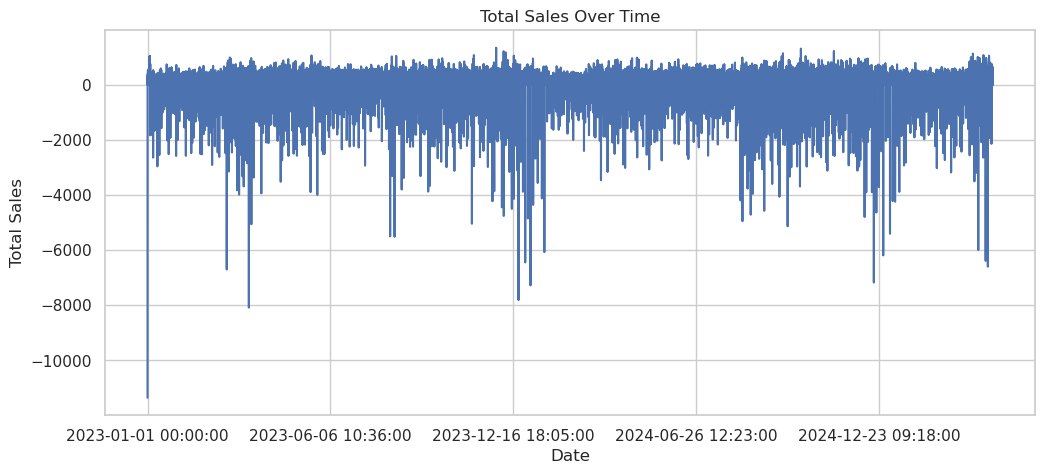

In [61]:
plt.figure(figsize=(12,5))
df.groupby('Date')['Line Total'].sum().sort_index().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

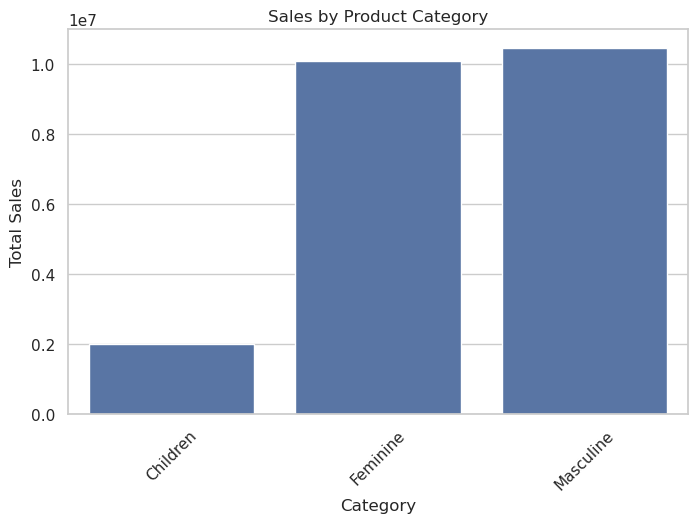

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=df.groupby('Category')['Line Total'].sum().index,
    y=df.groupby('Category')['Line Total'].sum().values
)
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


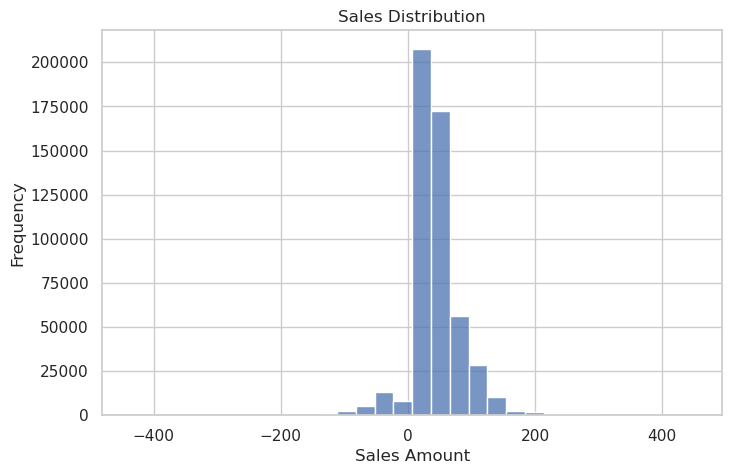

In [66]:
plt.figure(figsize=(8,5))
sns.histplot(df['Line Total'], bins=30)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


In [ ]:
This exploratory data analysis revealed sales trends over time, category-wise performance, and distribution patterns. The insights can help retail businesses optimize inventory planning, marketing strategies, and store performance.